1_Read dataset
2_Encoding
3_Normalization
4_Train_test_split
5_Train_model


In [1]:
import pandas as pd

from Projects.Functions.Config_Loader.config_loader import *
from Projects.Functions.Features_Engineering.features_engineering import *
from Projects.Functions.Modelisation.modelisation import *
from Projects.Functions.Models_generation.models_generation import *
from Projects.Functions.Report.report import *
from Projects.Functions.Pipeline_Modelisation.pipeline_modelisation import *
from scipy.stats import iqr, shapiro,kstest

In [2]:
config=ConfigLoader(r"C:\Users\tallar\Documents\PROJETS\EDA_and_ML\Projects\Configs\Config.json")

In [3]:
dataset=config.get_dataset_path()
print(f"dataset_path : {dataset}")
cible=config.get_project_target()
print(f"cible : {cible}")
modele_type=config.get_model_type()
print(f"model_type : {modele_type}")
test_fraction=config.get_test_fraction()
print(f"test_fraction : {test_fraction}")
model_path=config.get_model_path()
print(f"model_path : {model_path}")
alpha = config.get_alpha()
print(f"alpha : {alpha}")
correlation_limit = config.get_corr_limit()
print(f"correlation_limit : {correlation_limit}")
cross_validation =config.get_cross_validation()
print(f"cross_validation : {cross_validation}")
file_name =config.get_dataset_filename()
print(f"file_name : {file_name}")
columns_to_delete = config.get_deleted_columns()
print(f"columns_to_delete : {columns_to_delete}")
features_path = config.get_features_json_path()
print(f"features_path : {features_path}")
figure_path = config.get_figure_path()
print(f"figure_path : {figure_path}")
model_api_path=config.get_model_api_path()
print(f"model_api_path : {model_api_path}")
k_fold = config.get_fold_count()
print(f"k_fold : {k_fold}")
pca_dim = config.get_pca_dim()
print(f"pca_dim : {pca_dim}")
pca_variance = config.get_pca_variance()
print(f"pca_variance : {pca_variance}")

dataset_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Data/Houses.csv
cible : SalePrice
model_type : regression
test_fraction : 0.2
model_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/
alpha : 0.05
correlation_limit : 0.4
cross_validation : False
file_name : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Data/Houses.csv
columns_to_delete : ['SEQN', 'RIDAGEYR', 'id', 'No', 'Id', 'Column1', 'PassengerId', 'Name', 'Ticket', 'Cabin']
features_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Features/API/features.json
figure_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Figures/
model_api_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/API/
k_fold : 3
pca_dim : 0
pca_variance : 0.95


In [4]:
project_name="House_price"
project_name = project_name + " version_"+ str(datetime.now().year) +"_"+ str(datetime.now().month) +"_"+ str(datetime.now().day) +"_"+datetime.now().strftime("%H%M%S")
report=Report(project_name)

In [5]:
df= dataset_reading(dataset)
cible=cible
raw_features=df.drop(cible, axis=1)
raw_features= dataset_object_to_categorical(raw_features)
raw_features=dataset_na_fill(raw_features, cible)


raw_targets=df[cible]

In [6]:
df = dataset_object_to_categorical(df)
df=dataset_na_fill(df,cible)

In [7]:

features, target = encoding_categorical_features(df,cible)
print(features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260      

In [8]:
features_train, features_test, target_train, target_test = split_dataset(features,target,test_fraction,42)

In [9]:
features, features_train_scaled, features_test_scaled = scale_features(features_train,features_test)

In [10]:
modeles=generate_list_of_models(modele_type)

ok
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3604
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 179
[LightGBM] [Info] Start training from score 181441.541952
Ce modèle ne dispose pas d'un attribut `loss_curve_`.


C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.


C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.081e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.


C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


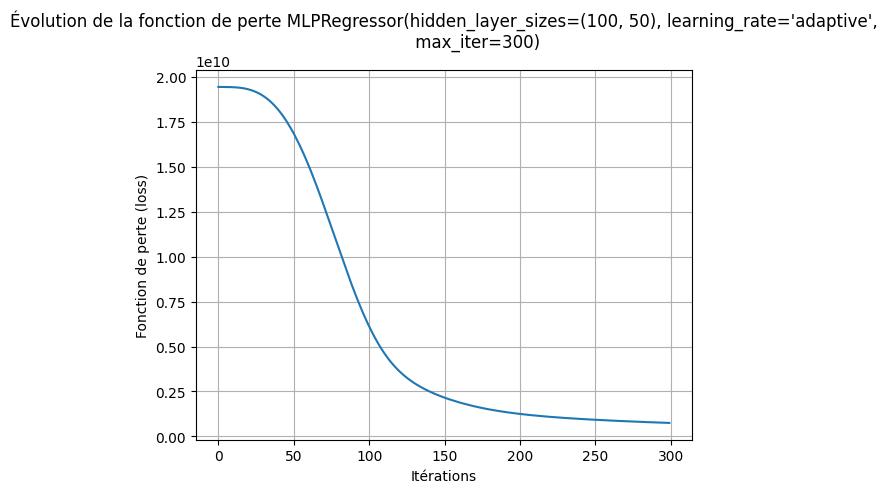

10
[['Modele', 'MSE', 'RMSE', 'R2'], ['gradient_boost', 727964045.175, 26980.809, 0.905], ['xgboost', 693468928.0, 26333.798, 0.91], ['lgb_boost', 858547665.433, 29300.984, 0.888], ['adaboost', 720479749.134, 26841.754, 0.906], ['histgboost', 845624822.285, 29079.629, 0.89], ['randomForest', 877726751.739, 29626.454, 0.886], ['lasso', 799502925.479, 28275.483, 0.896], ['Ridge', 810761186.884, 28473.868, 0.894], ['knn', 1896998560.4, 43554.547, 0.753], ['tree', 1565821438.82, 39570.462, 0.796], ['mlp', 2090584048.936, 45722.905, 0.727]]


In [11]:
pipeline_model, predictions, recall,accuracy,f1score,precision,mse, r2, tab_modele, dict_modeles =training_machine_learning_models(modele_type,modeles,False, features_train_scaled,features_test_scaled,target_train,target_test)

print(tab_modele)

In [12]:
best_modele, pipeline_best_model, best = evaluation_of_trained_models(predictions , dict_modeles,pipeline_model, modele_type, target_test, recall,accuracy,f1score,precision,mse, r2, tab_modele, figure_path)

In [13]:
print(best)

xgboost


In [14]:
results = generate_results(tab_modele,modele_type)

In [15]:
results.head()

,Modele,MSE,RMSE,R2
1,xgboost,6.934689e+08,26333.798,0.910
3,adaboost,7.204797e+08,26841.754,0.906
0,gradient_boost,7.279640e+08,26980.809,0.905
6,lasso,7.995029e+08,28275.483,0.896
7,Ridge,8.107612e+08,28473.868,0.894


In [16]:
report.doc_add_table(results)

In [17]:
print(config.get_report_path())

C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Reports/


In [18]:
pipeline = build_the_final_pipeline(pipeline_best_model,raw_features,raw_targets,cible)

In [19]:
saving_of_best_model_for_production(model_path,model_api_path,pipeline,best,project_name)

C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/House_price version_2025_7_20_180255_xgboost_pipeline_model.joblib
C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/API/House_price version_2025_7_20_180255_xgboost_pipeline_model.joblib


In [20]:
generate_data_contract_for_frontEnd(raw_features,features_path)

{'Id': 'int64  : values = [ 1 to 1460 ]', 'MSSubClass': 'int64  : values = [ 20 to 190 ]', 'MSZoning': "category  : values = ['RL', 'RM', 'C (all)', 'FV', 'RH']", 'LotFrontage': 'float64  : values = [ 21.0 to 313.0 ]', 'LotArea': 'int64  : values = [ 1300 to 215245 ]', 'Street': "category  : values = ['Pave', 'Grvl']", 'Alley': "category  : values = ['Grvl', 'Pave']", 'LotShape': "category  : values = ['Reg', 'IR1', 'IR2', 'IR3']", 'LandContour': "category  : values = ['Lvl', 'Bnk', 'Low', 'HLS']", 'Utilities': "category  : values = ['AllPub', 'NoSeWa']", 'LotConfig': "category  : values = ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']", 'LandSlope': "category  : values = ['Gtl', 'Mod', 'Sev']", 'Neighborhood': "category  : values = ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'B

In [21]:
report.report_builder(config.get_report_path())